# Chapter 4 - Find out on which weekday people bike the most with groupby and aggregate

In [1]:
%pylab inline
import pandas as pd

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
figsize(15, 5)

# Always display all the columns
pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

import matplotlib
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib
line_width has been deprecated, use display.width instead (currently both are
identical)



## 4.1 Adding a 'weekday' column to our dataframe

In [2]:
bike = pd.read_csv('./data/bikes.csv', sep=';', encoding='latin1', parse_dates='Date', dayfirst=True, index_col='Date')

In [4]:
bike[: 5]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


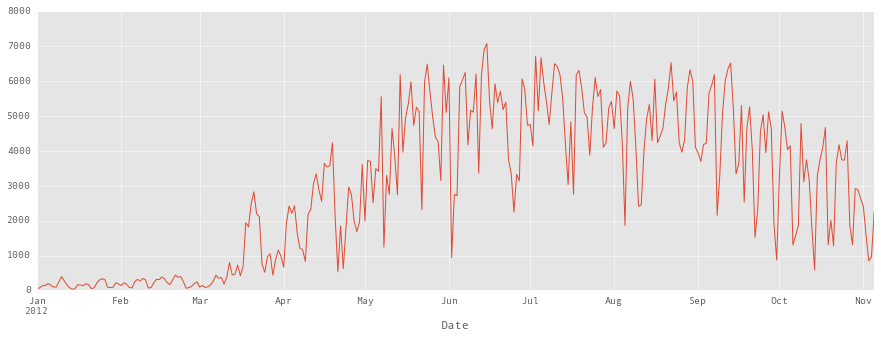

In [5]:
bike['Berri 1'].plot()

In [6]:
berri_bike = bike[['Berri 1']]

In [7]:
berri_bike[: 5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [8]:
berri_bike.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name=u'Date', length=310, freq=None)

In [9]:
berri_bike.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

In [10]:
berri_bike.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

In [11]:
berri_bike['weekday'] = berri_bike.index.weekday

/Users/wangshuailong/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
berri_bike[: 5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


## 4.2 Adding up the cyclists by weekday

In [13]:
weekday_counts = berri_bike.groupby('weekday').aggregate(sum)

In [14]:
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [15]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [16]:
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


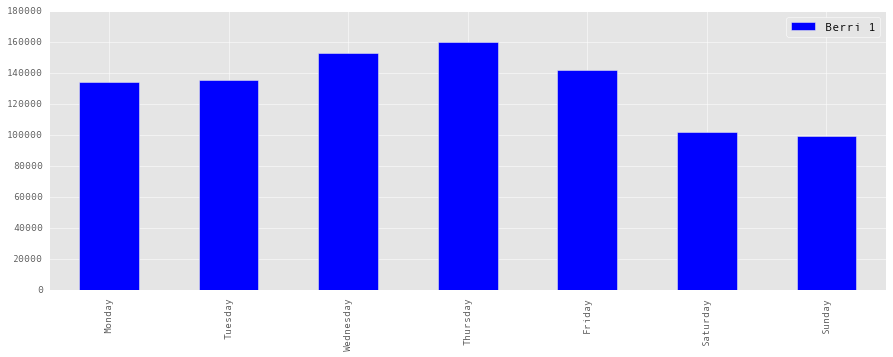

In [17]:
weekday_counts.plot(kind='bar')